# **k-nearesr neighbours**
# By: Vivek Vittal Biragoni 211AI041 
16/05/23


Import the necessary libraries:

In [34]:
from sklearn.datasets import load_iris
import numpy as np


Load the Iris dataset using the load_iris() function:

In [35]:
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target variable


Define a function to compute the Euclidean distance between two data points:

In [36]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


Notes:


euclidean_distance(point1, point2): This function calculates the Euclidean distance between two data points. It takes two points as input and returns the Euclidean distance as a floating-point number.

Define a function to find the k-nearest neighbors for a given data point:

In [37]:
def k_nearest_neighbors(X, point, k):
    distances = []
    for i in range(len(X)):
        distance = euclidean_distance(X[i], point)
        distances.append((distance, i))
    distances.sort()  # Sort distances in ascending order
    neighbors = [distances[i][1] for i in range(k)]  # Get indices of k nearest neighbors
    return neighbors


Notes

k_nearest_neighbors(X, point, k): This function finds the k-nearest neighbors for a given data point. It takes the feature matrix X, a single data point point, and the value of k as input. It computes the Euclidean distance between the data point and all other points in X, sorts the distances in ascending order, and returns the indices of the k nearest neighbors.

Define a function to perform 10-fold cross-validation and evaluate the accuracy of k-nearest neighbors:

In [51]:
def cross_validation(X, y, k):
    fold_size = len(X) // 10
    accuracies = []
    for i in range(10):
        # Split data into training and testing sets
        test_indices = list(range(i * fold_size, (i + 1) * fold_size))
        train_indices = list(set(range(len(X))) - set(test_indices))
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        correct_predictions = 0
        for j in range(len(X_test)):
            neighbors = k_nearest_neighbors(X_train, X_test[j], k)
            neighbor_labels = [y_train[idx] for idx in neighbors]
            predicted_label = max(set(neighbor_labels), key=neighbor_labels.count)
            if predicted_label == y_test[j]:
                correct_predictions += 1

            # Print nearest neighbors for random data points
            if j == 0 :
                print(f"Test instance {j+1} - Nearest neighbors: {neighbors}")
            # print(f"Test instance {j+1} - Nearest neighbors: {neighbors}")
        accuracy = correct_predictions / len(X_test)
        accuracies.append(accuracy)
        print(f"Accuracy for fold {i + 1}: {accuracy:.2f}")
    
    
    mean_accuracy = np.mean(accuracies)
    return mean_accuracy


Notes 


cross_validation(X, y, k): This function performs 10-fold cross-validation to evaluate the accuracy of the k-nearest neighbors algorithm. It takes the feature matrix X, target variable y, and the value of k as input. It splits the data into 10 folds, trains the k-nearest neighbors model on 9 folds, and evaluates its performance on the remaining fold. It computes the accuracy for each fold, prints the nearest neighbors for each test instance, and returns the average accuracy across all folds.

Call the cross_validation() function with k=10 to compute the average accuracy using 10-fold cross-validation:

In [52]:
k = 10
accuracy = cross_validation(X, y, k)
print(f"Average accuracy using 10-fold cross-validation: {accuracy:.2f}")


Test instance 1 - Nearest neighbors: [2, 25, 28, 24, 12, 11, 13, 6, 8, 22]
Test instance 2 - Nearest neighbors: [10, 19, 30, 15, 20, 14, 34, 8, 32, 11]
Test instance 3 - Nearest neighbors: [14, 32, 15, 9, 30, 19, 20, 27, 34, 11]
Test instance 4 - Nearest neighbors: [32, 14, 15, 23, 27, 30, 19, 9, 10, 20]
Test instance 5 - Nearest neighbors: [22, 25, 28, 2, 6, 11, 4, 29, 31, 24]
Test instance 6 - Nearest neighbors: [1, 33, 17, 3, 18, 4, 29, 31, 6, 21]
Test instance 7 - Nearest neighbors: [32, 7, 9, 14, 27, 15, 22, 11, 25, 28]
Test instance 8 - Nearest neighbors: [11, 24, 25, 28, 34, 2, 8, 20, 9, 13]
Test instance 9 - Nearest neighbors: [23, 27, 32, 30, 14, 15, 19, 10, 26, 9]
Test instance 10 - Nearest neighbors: [19, 15, 10, 20, 30, 34, 14, 8, 11, 9]
Test instance 11 - Nearest neighbors: [33, 1, 21, 12, 5, 16, 6, 3, 4, 29]
Test instance 12 - Nearest neighbors: [9, 11, 14, 25, 28, 34, 22, 20, 32, 7]
Test instance 13 - Nearest neighbors: [30, 15, 19, 10, 14, 20, 32, 34, 23, 9]
Test instan

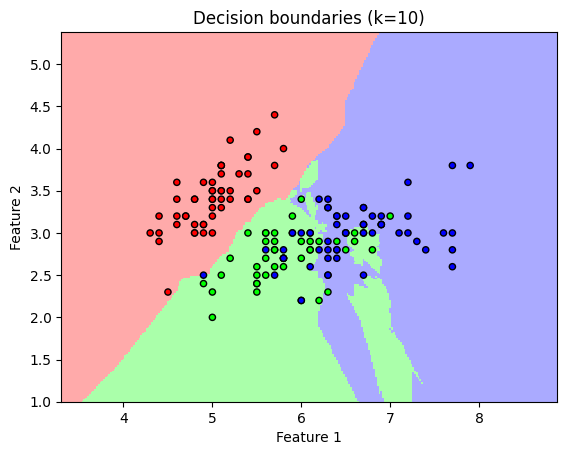

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Define a function to plot the decision boundaries of the k-nearest neighbors algorithm
def plot_decision_boundaries(X, y, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create an instance of k-nearest neighbors classifier
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    # Predict the class labels for all points in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries and data points
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Decision boundaries (k={k})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization
y = iris.target

# Set the value of k
k = 10

# Plot the decision boundaries of the k-nearest neighbors algorithm
plot_decision_boundaries(X, y, k)


To visualize the decision boundaries of the k-nearest neighbors algorithm on the Iris dataset, the following steps are taken:

1. Import the necessary libraries:
   - `numpy` for numerical computations
   - `matplotlib.pyplot` for data visualization
   - `matplotlib.colors.ListedColormap` for custom color maps
   - `sklearn.datasets.load_iris` to load the Iris dataset
   - `sklearn.neighbors.KNeighborsClassifier` for the k-nearest neighbors classifier

2. Define the function `plot_decision_boundaries`:
   - Takes feature matrix `X`, target vector `y`, and value of `k` as input
   - Creates a meshgrid to cover the feature space
   - Sets up color maps for plotting
   - Sets the step size for the meshgrid
   - Determines the minimum and maximum values for the x and y axes
   - Creates the meshgrid using `np.meshgrid` based on the minimum and maximum values
   - Creates an instance of `KNeighborsClassifier` with `n_neighbors` set to `k`
   - Fits the classifier on the feature matrix `X` and target vector `y`
   - Predicts the class labels for all points in the mesh using `clf.predict`
   - Reshapes the predicted labels to match the meshgrid shape
   - Plots the decision boundaries using `plt.pcolormesh`
   - Plots the data points using `plt.scatter`
   - Sets the x and y limits of the plot
   - Adds a title, x-label, and y-label to the plot
   - Displays the plot using `plt.show`

3. Load the Iris dataset using `load_iris` from `sklearn.datasets` module.

4. Select the first two features of the dataset for visualization.

5. Set the value of `k` to 10.

6. Call the `plot_decision_boundaries` function with the feature matrix `X`, target vector `y`, and value of `k`.

The resulting plot shows the decision boundaries of the k-nearest neighbors algorithm along with the data points from the Iris dataset. It helps visualize how the algorithm classifies the different classes in the dataset based on the chosen features and the value of `k`.

# **K-Nearest Neighbors (KNN)**
K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm that can be used for both classification and regression tasks. Here are some key points about KNN:

1. Principle: KNN is based on the principle that objects or data points that are close to each other in a feature space are likely to belong to the same class or have similar properties.

2. Training: KNN does not involve explicit training. Instead, it stores the entire training dataset and uses it during the prediction phase.

3. Distance Metric: KNN measures the similarity between data points using a distance metric, commonly the Euclidean distance. Other distance metrics like Manhattan distance or Minkowski distance can also be used.

4. Hyperparameter K: KNN requires specifying the value of K, which represents the number of nearest neighbors to consider. The choice of K affects the model's bias-variance trade-off. Smaller K values result in more complex decision boundaries, while larger K values result in smoother decision boundaries.

5. Prediction: To make a prediction for a new data point, KNN finds the K nearest neighbors based on the distance metric and assigns the class label based on the majority vote among the neighbors (for classification) or calculates the mean (for regression).

6. Feature Scaling: Feature scaling is often necessary in KNN because it is sensitive to the scales of different features. Rescaling the features to a common scale can improve the performance of KNN.

7. Curse of Dimensionality: KNN can be affected by the curse of dimensionality, where the distance between data points becomes less meaningful as the number of dimensions increases. In high-dimensional spaces, KNN may not perform as well, and dimensionality reduction techniques can be used.

8. Pros:
   - Simple to understand and implement.
   - Non-parametric model, so it can handle complex decision boundaries.
   - Can be used for both classification and regression tasks.
   - Robust to noisy data.

9. Cons:
   - Can be computationally expensive when dealing with large datasets.
   - Requires storing the entire training dataset.
   - Sensitive to the choice of K and the distance metric.
   - Doesn't provide insight into the underlying relationships between features.

10. Use Cases: KNN is commonly used in various domains, including pattern recognition, image classification, document classification, recommendation systems, and anomaly detection.

Overall, KNN is a versatile algorithm that is easy to understand and implement. It is suitable for smaller datasets and can be a good starting point for classification and regression tasks, especially when there is no prior knowledge about the data distribution.